In [1]:
!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df.head() #binary classification model to predict churn

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
#feature engineering

geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

X = pd.concat([X, geography, gender], axis=1)
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [8]:
X.drop(columns=["Geography", "Gender"], inplace=True)
X.head() #feature matrix

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)



In [10]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)


In [13]:
train_x.shape

(8000, 11)

In [14]:
#ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout


In [15]:
#initializing ANN
classifier= Sequential()

#add input layer
classifier.add(Dense(units=11, activation='relu'))

#first hidden layer
classifier.add(Dense(units=7, activation='relu'))

#second hidden layer
classifier.add(Dense(units=6, activation='relu'))

#output layer
classifier.add(Dense(units=1, activation='sigmoid'))



In [16]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])


In [19]:
#Early Stopping
import tensorflow as tf
early_stopping= tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [20]:
model_history = classifier.fit(train_x, train_y, validation_split=0.33, batch_size=10, epochs=1000, callbacks=[early_stopping])


Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3173 - accuracy: 0.8645 - val_loss: 0.3731 - val_accuracy: 0.8459
Epoch 2/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3164 - accuracy: 0.8673 - val_loss: 0.3724 - val_accuracy: 0.8448
Epoch 3/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3164 - accuracy: 0.8668 - val_loss: 0.3772 - val_accuracy: 0.8425
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3179 - accuracy: 0.8655 - val_loss: 0.3773 - val_accuracy: 0.8417
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3161 - accuracy: 0.8671 - val_loss: 0.3741 - val_accuracy: 0.8451
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3150 - accuracy: 0.8675 - val_loss: 0.3742 - val_accuracy: 0.8444
Epoch 7/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3164 - accuracy: 0.8660 - val_loss: 0.3762 - val_accuracy:

In [21]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

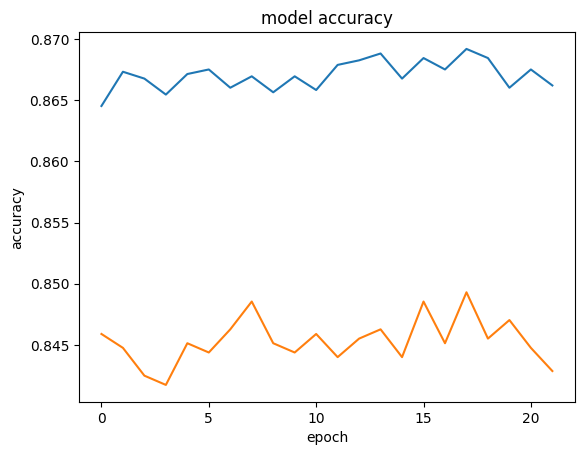

In [23]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

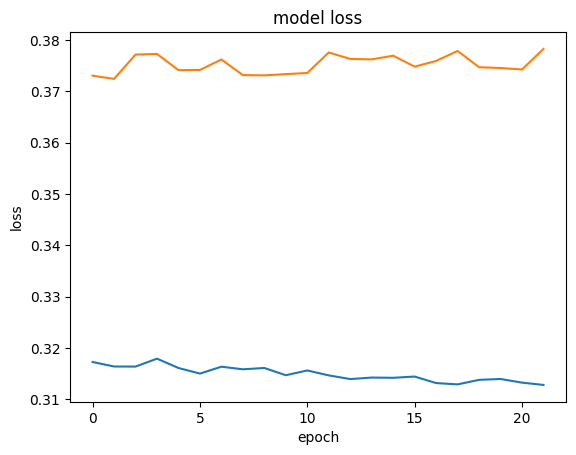

In [24]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [25]:
y_pred = classifier.predict(test_x)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 3ms/step


In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [27]:
cm

array([[1506,   89],
       [ 199,  206]])

In [28]:
##calculate accuracy, f1, recall, precision

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

accuracy_score(test_y, y_pred)

0.856

In [ ]:
classifier.get_weights()